In [1]:
!pip install scanpy
!pip install anndata
!pip install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modIfied

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
# Import core single cell tools

import scanpy as sc
import anndata as ad


In [3]:
#import data
!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad

bone_marrow_adata = sc.read_h5ad("bone_marrow.h5ad")
print(bone_marrow_adata)

--2025-11-19 16:39:20--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-19 16:39:20--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  56.0MB/s    in 6.2s    

2025-11-19 16:39:27 (54.5 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/35450

In [4]:
# dimensions of our dataset
bone_marrow_adata.shape
# 14783 cells
# 17374 genes

(14783, 17374)

In [5]:
# let's look at the first 5 rows describing the genes in our dataset
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [6]:
# let's look at the first 5 rows describing the cells (ID) in our dataset
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [7]:
# how about both in a proper dataframe format
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# A useful step for older datasets
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()


In [10]:
#Let's search for possible contamination from dying cells, ribosomal transcripts or hemoglobin

#Cells with a high proportion of mitochondrial reads (say >10–20%) are likely stressed, apoptotic, or poorly captured
#Ribosomal transcripts are removed because they represent global transcriptional activity, not cell-type-specific biology
#Instead of true cell populations, high HB signal often represents ambient RNA contamination from lysed red blood cells

bone_marrow_adata.var['MT'] = bone_marrow_adata.var_names.str.startswith("MT-")
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith("RPS", "RPL")
bone_marrow_adata.var['HB'] = bone_marrow_adata.var_names.str.startswith("^HB[^(P)]")

In [11]:
#let's just take a quick look at one of them.

mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes


,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [12]:
#calculate the qc metrics

sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [13]:
#note that it is also included in the headers of obs

bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#and your gene list
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


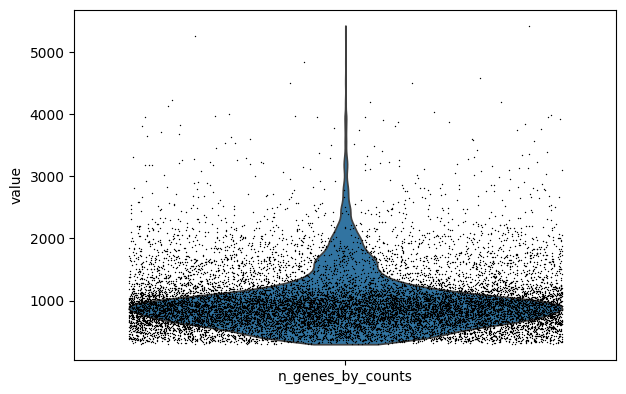

In [15]:
#what is the average number of genes that have at least one detected identifier in each cell.
#in other words, the number of genes expressed in each cell

sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

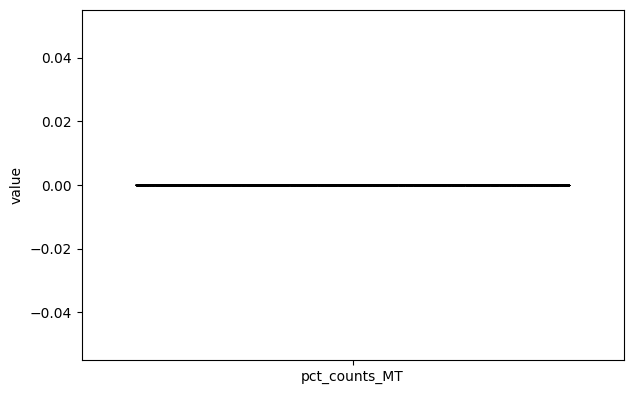

In [16]:
#what about those mitochondrial genes?
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)


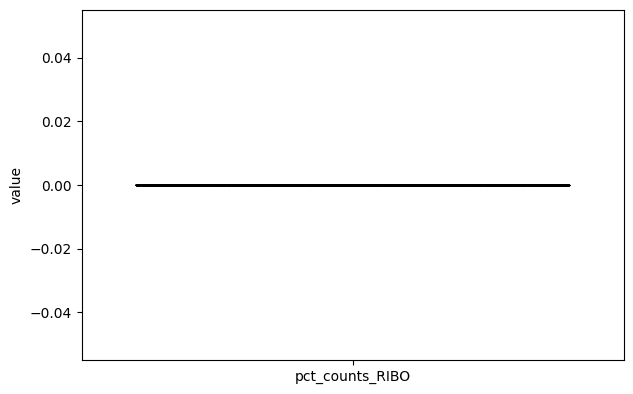

In [17]:
#and the ribosomal genes
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

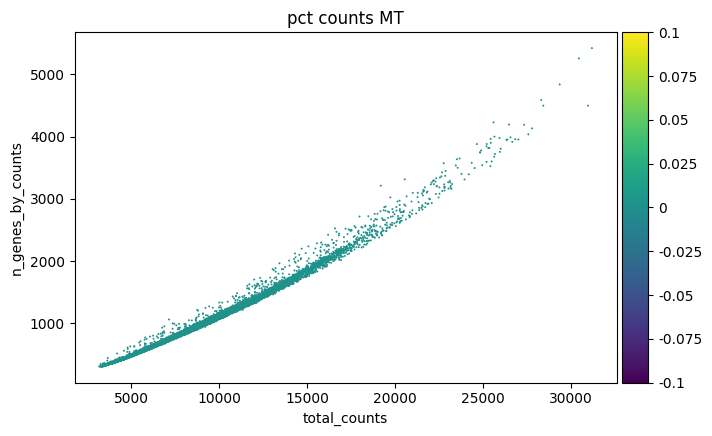

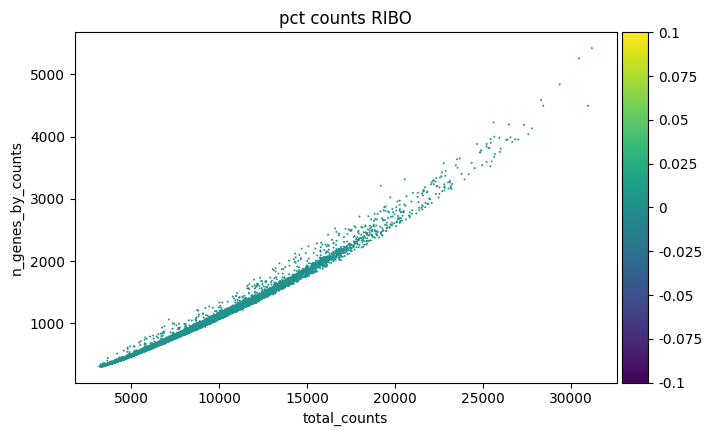

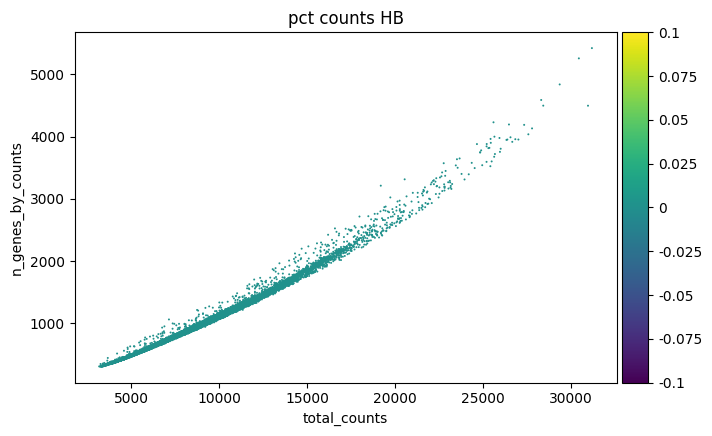

In [18]:
#let's visualize the three of them. And let's see where the mitochondrial genes are
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

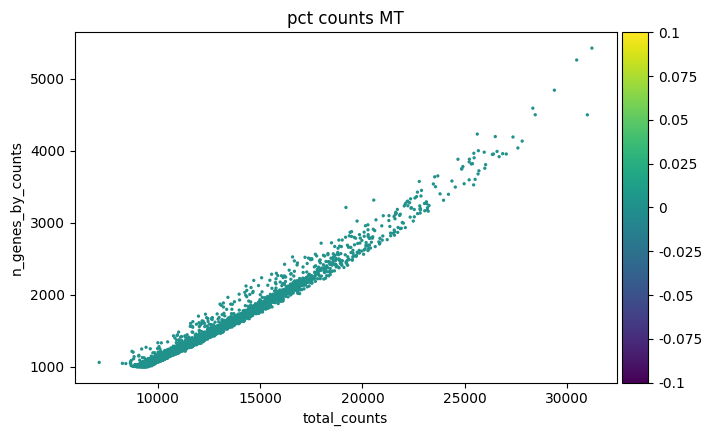

In [19]:
"""
Additionally, it is important to note that for datasets with multiple batches,
quality control should be performed for each sample individually as quality
control thresholds can vary substantially between batches.
"""

#Let's use the data MT plot to select things to remove
sc.pp.filter_cells(bone_marrow_adata, min_genes=1000)
sc.pp.filter_genes(bone_marrow_adata, min_cells=1000)

sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")


In [21]:
# we can also further filter for ribosomal contaminations using

bone_marrow_adata = bone_marrow_adata[
    bone_marrow_adata.obs['pct_counts_RIBO'] < 10,
    :
]

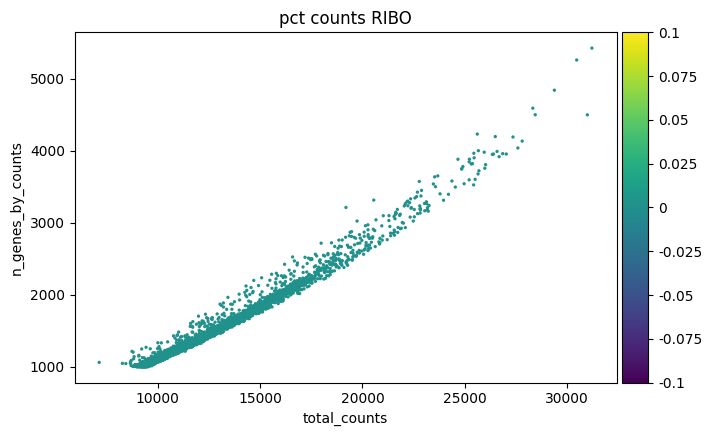

In [22]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")


In [23]:
#doublet detection
##Identifying doublets is crucial as they can lead to misclassifications or
##distortions in downstream analysis steps

sc.pp.scrublet(bone_marrow_adata) #if you have multiple batch samples, you can specify it with batch_key="sample"

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [24]:
#Normalization
# Save a copy of the data
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [25]:
# Normalizing to median total counts
sc.pp.normalize_total(bone_marrow_adata)

In [26]:
# Logarithmize the data
sc.pp.log1p(bone_marrow_adata)

In [27]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

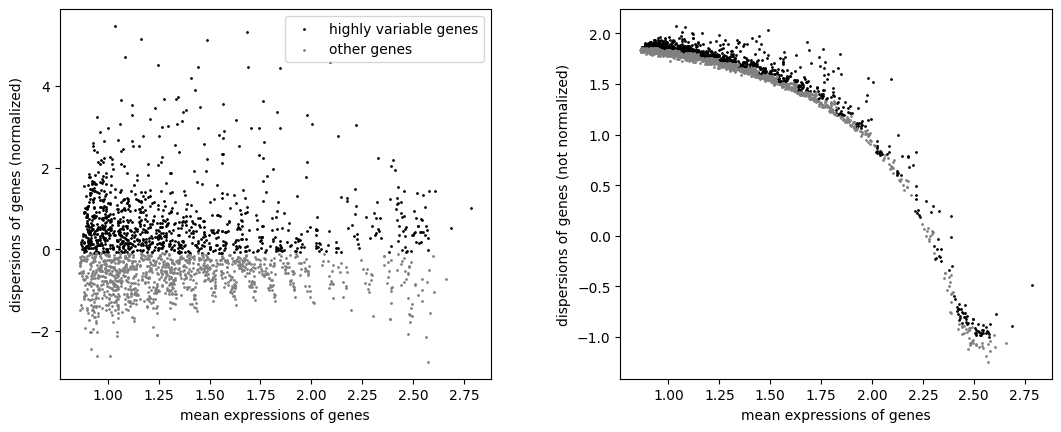

In [28]:
sc.pl.highly_variable_genes(bone_marrow_adata )
#left is normalized
#right is not

In [29]:
sc.tl.pca(bone_marrow_adata)

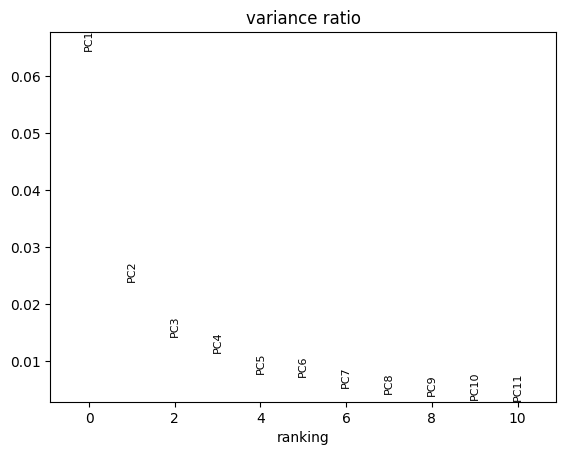

In [30]:
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

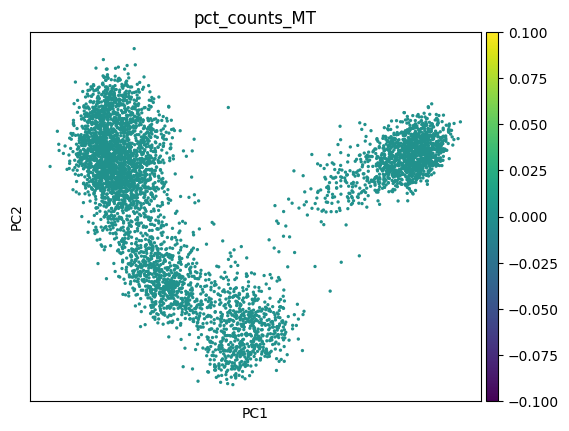

In [31]:
sc.pl.pca(
    bone_marrow_adata,
    color=["pct_counts_MT"]
)


In [32]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [33]:
sc.pp.neighbors(bone_marrow_adata)

In [34]:
sc.tl.umap(bone_marrow_adata)

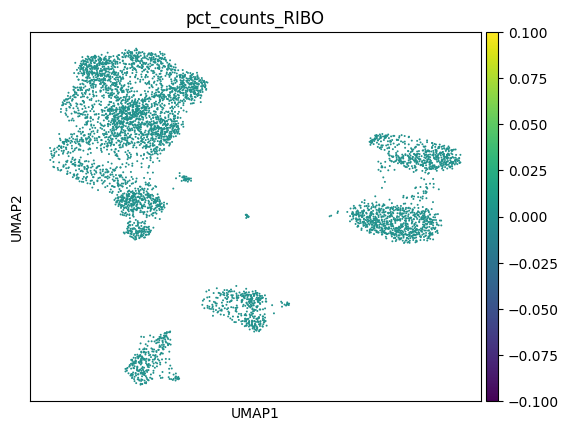

In [35]:
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [36]:
# Clustering by communities.

##Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states.

## Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships.

## Usually used for cell type detection

# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

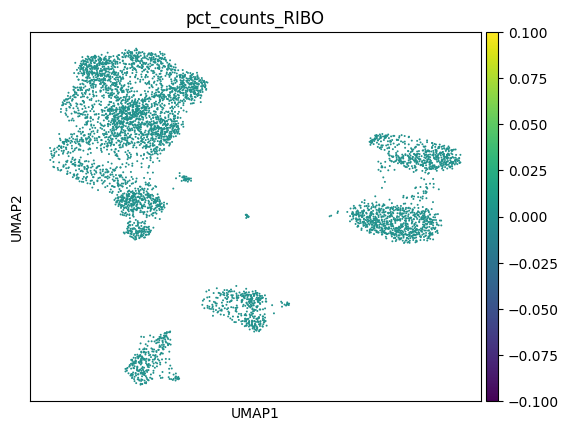

In [37]:
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

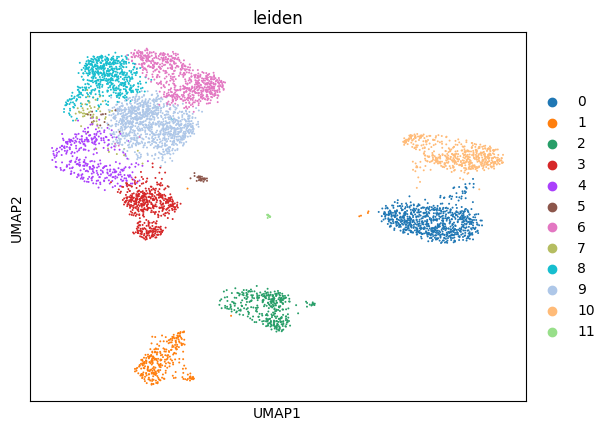

In [38]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

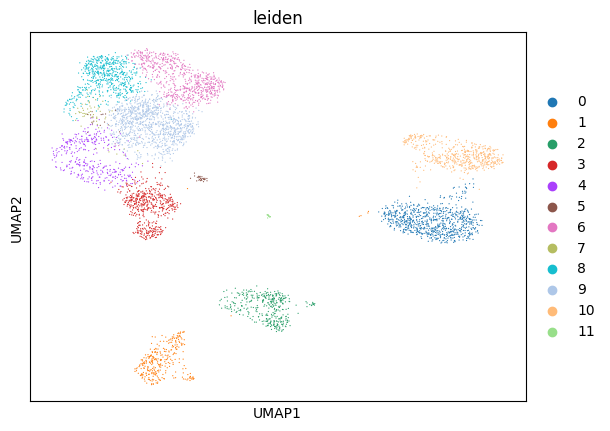

In [39]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

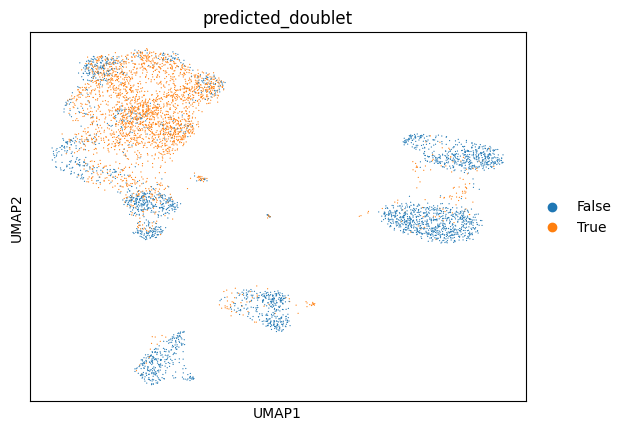

In [40]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [41]:
#Further reclustering
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)


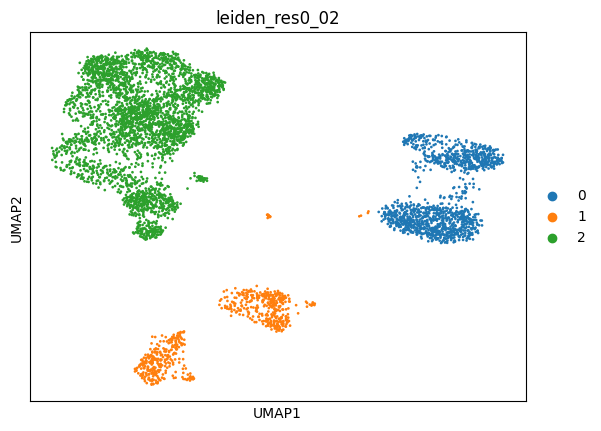

In [42]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

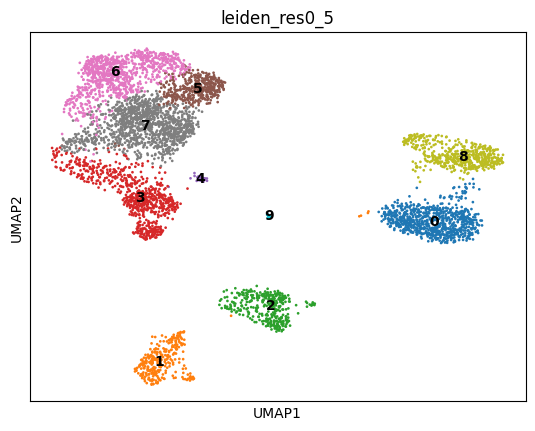

In [43]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

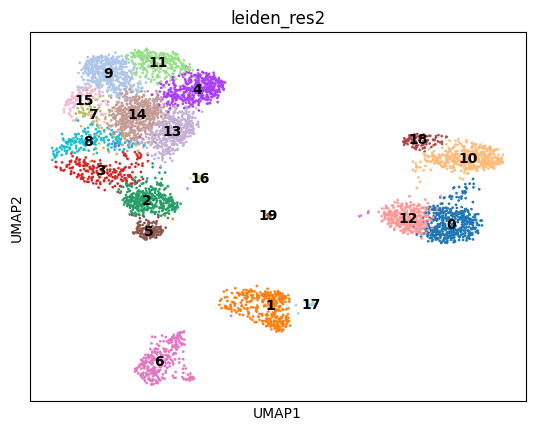

In [44]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)


In [50]:
!wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

--2025-11-19 17:10:14--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [       <=>          ]   1.71M  1.31MB/s    in 1.3s    

2025-11-19 17:10:17 (1.31 MB/s) - ‘result.txt’ saved [1795328]



In [52]:
import pandas as pd

# Read the CSV file, explicitly specifying that there is no header
# and providing the column names we expect based on the BioMart query.
ensembl_var = pd.read_csv('/content/result.txt', header=None, names=['ensembl_gene_id', 'gene_name'])

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [53]:
import decoupler as dc

In [54]:
#Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [55]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Bergmann glia,ENSG00000175899
1,Mast cells,ENSG00000128274
3,Pinealocytes,ENSG00000129673
4,Astrocytes,ENSG00000129673
5,Sertoli cells,ENSG00000205002


In [56]:
#load the gene expression matrix into dc

dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin=3)

In [57]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 5262 × 50
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pc

In [58]:
#preview the data
bone_marrow_adata.obsm["score_ulm"].head()


,Adipocytes,Astrocytes,B cells,B cells memory,B cells naive,Basophils,Bergmann glia,Cardiomyocytes,Chondrocytes,Dendritic cells,...,Platelets,Podocytes,Pulmonary alveolar type II cells,Satellite glial cells,Sebocytes,Sertoli cells,T cells,T helper cells,Thymocytes,Tuft cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,1.460692,0.298487,-0.000337,-0.419594,0.129512,0.865510,0.456314,0.867221,1.575215,3.718685,...,0.964409,-1.429183,0.811173,0.955717,0.917982,0.897494,-3.588709,-0.308724,-2.338617,1.248986
Guo-AAACCTGCACACCGCA-4,-1.411195,0.287648,2.974706,3.080850,4.091592,-0.029900,-0.344898,1.185732,-1.213021,1.886843,...,-0.623571,-1.221687,-1.221687,-1.221687,-1.221687,0.008936,-1.301226,1.185732,0.921521,0.092224
Guo-AAACCTGCATCCAACA-3,-0.341500,0.388333,-1.212332,0.146935,-0.421530,0.693984,-0.255416,0.002494,-1.215073,-1.304155,...,-0.123707,0.082764,-1.190560,-1.190560,-1.190560,-1.190560,2.572069,0.127629,0.279757,0.060330
Guo-AAACCTGGTTCAGGCC-4,1.171881,-0.184568,-0.434528,0.722301,0.505610,-2.077936,0.343526,0.632583,-0.536015,0.999827,...,1.175083,-0.465036,-1.563469,-1.563469,-0.465036,-1.563469,2.122427,-0.465036,-0.536015,-0.476229
Guo-AAACCTGTCAAGGTAA-2,0.385254,-0.099137,1.522176,0.834237,0.555282,-1.154290,0.412979,0.876467,-0.265749,0.085414,...,0.784186,-1.463556,-1.463556,-0.280989,-0.334548,-1.463556,1.671384,0.876467,-0.203043,0.441824


In [59]:
bone_marrow_adata.obsm["score_ulm"].columns


Index(['Adipocytes', 'Astrocytes', 'B cells', 'B cells memory',
       'B cells naive', 'Basophils', 'Bergmann glia', 'Cardiomyocytes',
       'Chondrocytes', 'Dendritic cells', 'Embryonic stem cells',
       'Endothelial cells', 'Eosinophils', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma delta T cells', 'Germ cells', 'Hematopoietic stem cells',
       'Hepatocytes', 'Keratinocytes', 'Kupffer cells',
       'Luminal epithelial cells', 'Macrophages', 'Mast cells',
       'Megakaryocytes', 'Mesangial cells', 'Microfold cells', 'Microglia',
       'Monocytes', 'Müller cells', 'NK cells', 'Natural killer T cells',
       'Neurons', 'Neutrophils', 'Osteoclasts', 'Pancreatic progenitor cells',
       'Paneth cells', 'Plasma cells', 'Plasmacytoid dendritic cells',
       'Platelets', 'Podocytes', 'Pulmonary alveolar type II cells',
       'Satellite glial cells', 'Sebocytes', 'Sertoli cells', 'T cells',
       'T helper cells', 'Thymocyt

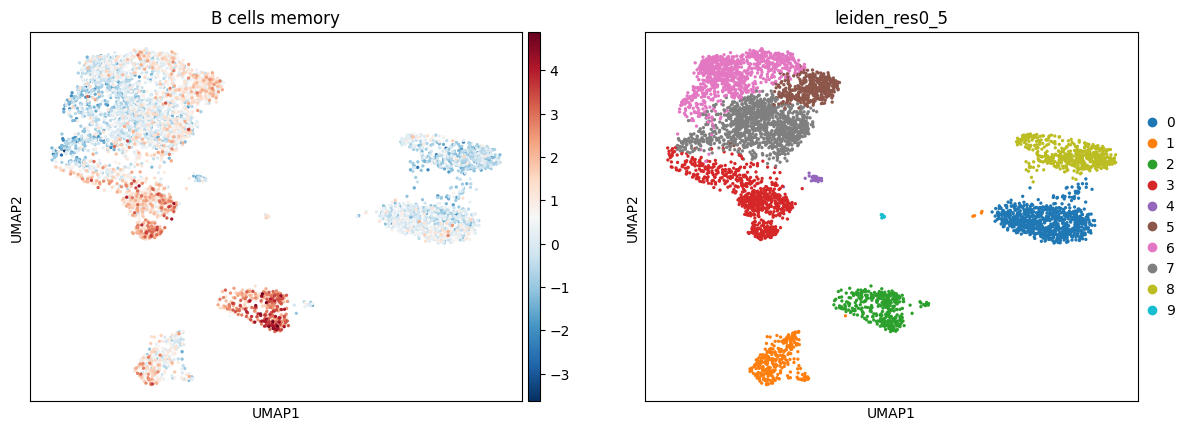

In [61]:
sc.pl.umap(score, color=["B cells memory", "leiden_res0_5"], cmap="RdBu_r")

In [62]:
import seaborn as sns

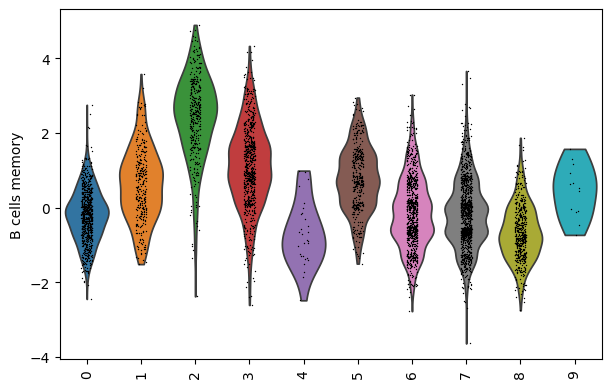

In [63]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_5", rotation=90)


In [65]:
#. Now let's know what each of the 7 clusters mean
#rank genes
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]
bone_marrow_adata_rank.head()


,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,54.476928,2.875171,0.000000e+00,0.000000e+00
1,0,rest,Dendritic cells,53.400320,3.199180,1.635841e-310,4.089603e-309
2,0,rest,Microglia,48.875719,2.358837,7.859930e-289,1.309988e-287
3,0,rest,Monocytes,44.771208,2.541640,1.235969e-255,1.544961e-254
5,0,rest,Satellite glial cells,36.665947,1.467578,2.282938e-213,1.902448e-212


In [66]:
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


/tmp/ipython-input-2640889597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [67]:
cluster_annotations


{'0': 'Neutrophils',
 '2': 'B cells naive',
 '3': 'T cells',
 '5': 'Eosinophils',
 '1': 'Plasma cells',
 '6': 'Gamma delta T cells',
 '7': 'T cells',
 '8': 'Dendritic cells',
 '4': 'Podocytes',
 '9': 'Platelets'}

In [68]:
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)


In [69]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(bone_marrow_adata.var_names)

plasma_cells_markers = markers[markers['source'].isin(['Plasma cells'])]['target']
plasma_cells_markers = plasma_cells_markers[plasma_cells_markers.isin(available_genes)]

neutrophils_markers = markers[markers['source'].isin(['Neutrophils'])]['target']
neutrophils_markers = neutrophils_markers[neutrophils_markers.isin(available_genes)]

t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]


#display(b_cell_markers)

In [70]:

marker_genes_dict = {
    "Plasma_cells": plasma_cells_markers.head().tolist(),
    "Neutrophils": neutrophils_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()
}



In [71]:
print(marker_genes_dict)

{'Plasma_cells': ['ENSG00000139193', 'ENSG00000104894', 'ENSG00000019582', 'ENSG00000121966', 'ENSG00000172115'], 'Neutrophils': ['ENSG00000159322', 'ENSG00000277632', 'ENSG00000203747', 'ENSG00000169896', 'ENSG00000143669'], 'T cells': ['ENSG00000271503', 'ENSG00000116824', 'ENSG00000198821', 'ENSG00000167286', 'ENSG00000198851']}


categories: B cells naive, Dendritic cells, Eosinophils, etc.
var_group_labels: Plasma_cells, Neutrophils, T cells


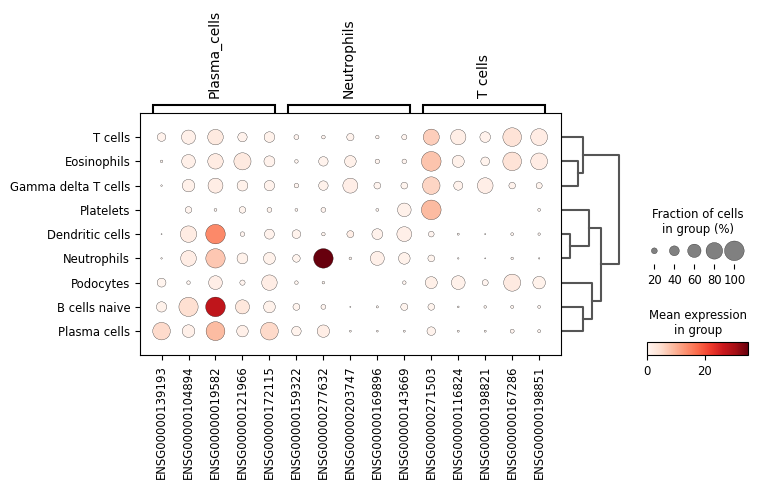

In [72]:
sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True)


categories: 0, 1, 2, etc.
var_group_labels: Plasma_cells, Neutrophils, T cells


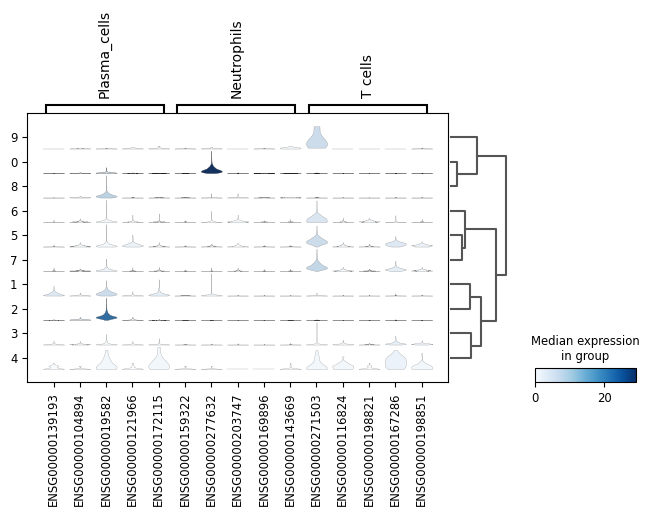

In [73]:
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5",  dendrogram=True
)


categories: 0, 1, 2, etc.
var_group_labels: Plasma_cells, Neutrophils, T cells


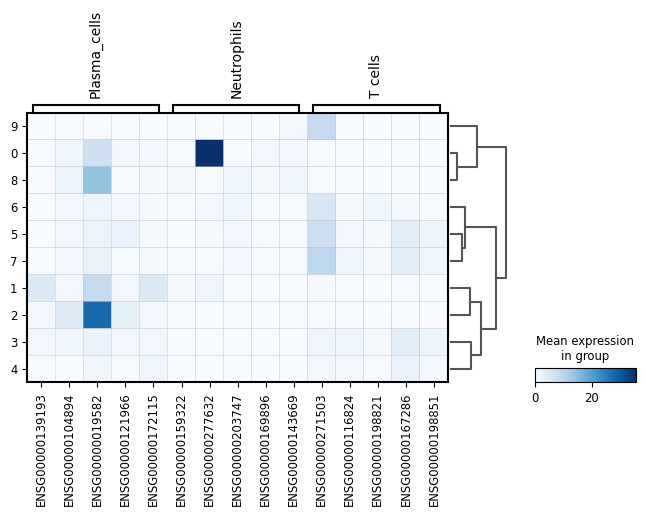

In [74]:
sc.pl.matrixplot(
    bone_marrow_adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Blues",
)


categories: 0, 1, 2, etc.
var_group_labels: Plasma_cells, Neutrophils, T cells


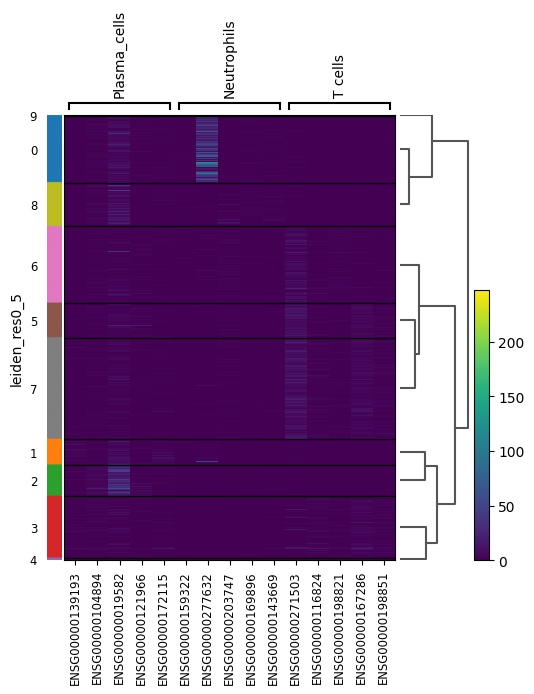

In [75]:

sc.pl.heatmap(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", cmap="viridis", dendrogram=True
)


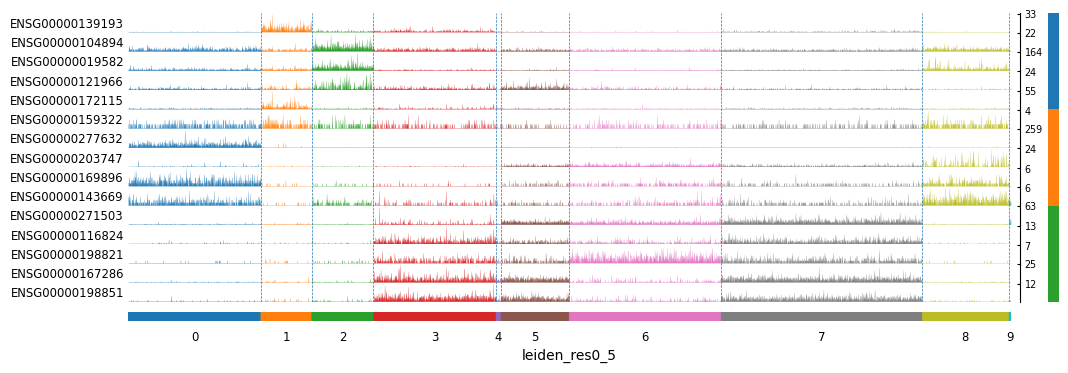

In [76]:
# @title Using genome tracks
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", dendrogram=False)
